# Sage test display notebook

This is to test various displays in the **Jupyter Notebook** (classic) or **JupyterLab**: LaTeX, interactive widgets, 2d and 3d plots, animated 3d plots, Matplotlib interface, etc., especially in the scope of `%display latex`. 

In [1]:
version()

'SageMath version 10.2.rc1, Release Date: 2023-11-10'

In [2]:
%display latex

In [3]:
sin(x^2)

sin(x^2)

Check that long outputs are wrapped (cf. this [comment in #36129](https://github.com/sagemath/sage/pull/36129#issuecomment-1711714578)):

In [4]:
((1+x)^20).expand()

x^20 + 20*x^19 + 190*x^18 + 1140*x^17 + 4845*x^16 + 15504*x^15 + 38760*x^14 + 77520*x^13 + 125970*x^12 + 167960*x^11 + 184756*x^10 + 167960*x^9 + 125970*x^8 + 77520*x^7 + 38760*x^6 + 15504*x^5 + 4845*x^4 + 1140*x^3 + 190*x^2 + 20*x + 1

## Miscellaneous outputs in the scope of `%display latex`

### Check that [#32859](https://github.com/sagemath/sage/issues/32859) is fixed (output of `type()`)

In [5]:
type(x)

<class 'sage.symbolic.expression.Expression'>

### Check that [#32208](https://github.com/sagemath/sage/issues/32208) is fixed

In [6]:
set([1,2])

{1, 2}

In [7]:
RubiksCube()

┌──────────────┐
             │  1    2    3 │
             │  4   top   5 │
             │  6    7    8 │
┌────────────┼──────────────┼─────────────┬────────────┐
│  9  10  11 │ 17   18   19 │ 25   26  27 │ 33  34  35 │
│ 12 left 13 │ 20  front 21 │ 28 right 29 │ 36 rear 37 │
│ 14  15  16 │ 22   23   24 │ 30   31  32 │ 38  39  40 │
└────────────┼──────────────┼─────────────┴────────────┘
             │ 41   42   43 │
             │ 44 bottom 45 │
             │ 46   47   48 │
             └──────────────┘

### Check that [#33729](https://github.com/sagemath/sage/issues/33729) is fixed

In [8]:
IntegerModRing(6)

Ring of integers modulo 6

## Test of IPython native LaTeX display via `_repr_latex_`

IPython implements LaTeX display of all objects that are endowed with a method `_repr_latex_`, cf. IPyhton's [rich display documentation](https://ipython.readthedocs.io/en/stable/config/integrating.html).

In [9]:
%display plain

In [10]:
s = sin(x^2)
s

sin(x^2)

In the plain text mode, the only way to get the LaTeX display of some object is via the function `view`, which generates a pdf file:

In [11]:
view(s)

Let us test the `_repr_latex_` mechanism of IPython via the method `_latex_` of Sage objects:

In [12]:
s._latex_()

'\\sin\\left(x^{2}\\right)'

In [13]:
class NativeDisplay(SageObject):

    def __init__(self, data):
        self._data = data

    def _repr_latex_(self):
        try:
            return '$' + self._data._latex_() + '$'
        except (AttributeError, NotImplementedError):  
            return None  # if None is returned, plain text is used


We get a LaTeX display, even if we are the scope of `%display plain`:

In [14]:
s

sin(x^2)

In [15]:
NativeDisplay(s)

In [16]:
NativeDisplay([s, s])

In [17]:
g = plot(s)
print(NativeDisplay(g))

Test of IPython native LaTeX display in the scope of `%display latex`
**(this fails in Sage 9.6.rc2 and Sage 10.2.rc1)**:

In [18]:
%display latex

NativeDisplay(s)

## Test of matplotlib.pyplot

### Check that [#32882](https://github.com/sagemath/sage/issues/32882) is fixed:

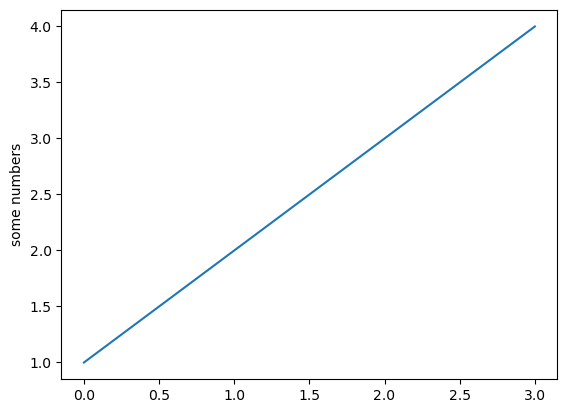

In [19]:
%display latex

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

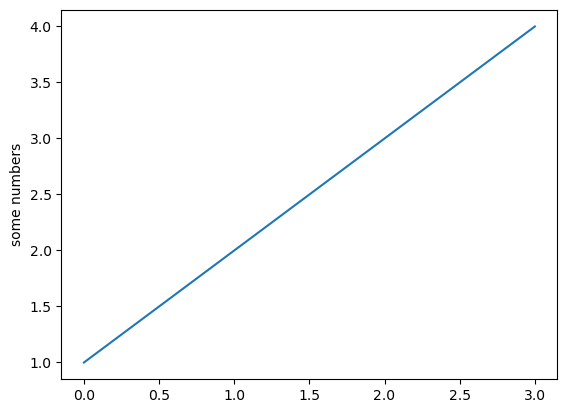

In [20]:
%display plain

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### Check that `%matplotlib notebook` and `%matplotlib widget` work in the scope of  `%display latex`  ([#33469](https://github.com/sagemath/sage/issues/33469))

`%matplotlib notebook` provides an interactive Matplotlib window in the Jupyter Notebook. It is however not supported by **Jupyterlab**; one should use `%matplotlib widget` instead (which requires the Python package `ipympl`).

**This failed in Sage 9.6.beta5 but has been fixed in Sage 9.6.beta7**:

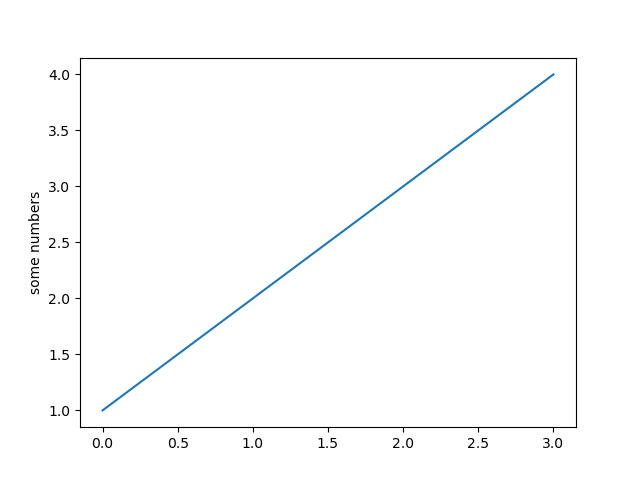

In [21]:
%display latex

#%matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

Test of the solution proposed at [#33469](https://github.com/sagemath/sage/issues/33469):

In [22]:
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.widget.Widget'>)

In [23]:
import ipywidgets
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES += (ipywidgets.Widget,)

sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.widget.Widget'>,
 <class 'ipywidgets.widgets.widget.Widget'>)

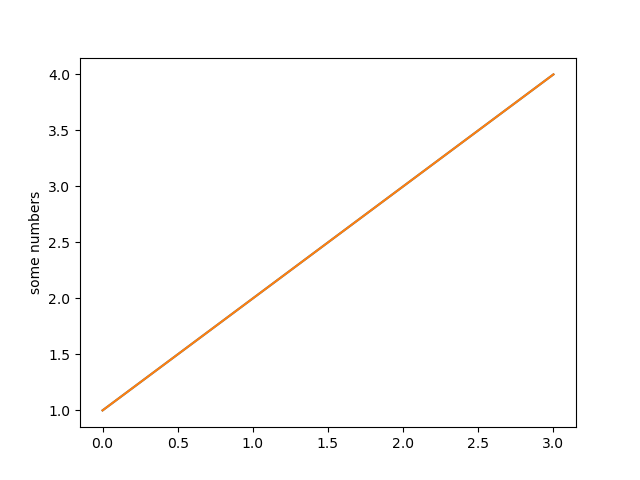

In [24]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Test of interact in the scope of `%display latex`

First we test it with `%display plain`:

In [25]:
%display plain 

@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f74ef5c85e0> with 1 widget
  n: IntSlider(value=10, description='n', max=30, min=-10)

and then we switch on the LaTeX display:

In [26]:
%display latex

In [27]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f74ef5c8ca0> with 1 widget
  n: IntSlider(value=10, description='n', max=30, min=-10)

## Test of 2d interactive plots

In [28]:
%display latex

In [29]:
@interact
def _(a = slider([1..10]), 
      color=Color('red'),
      axes=checkbox(True, 'Show axes'), 
      x_label=input_box('$x$', 'x-label', str),
      y_label=input_box('$y$', 'y-label', str)):
    axes_labels = [x_label, y_label] if axes else None
    show(plot(cos(a*x), (x, 0, 2*pi), color=color, thickness=2), 
         axes=axes, axes_labels=axes_labels)

Interactive function <function _ at 0x7f74a002fe20> with 5 widgets
  a: SelectionSlider(description='a', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)
  color: SageColorPicker(value='#ff0000', description='color')
  axes: Checkbox(value=True, description='Show axes')
  x_label: TransformText(value='$x$', description='x-label', layout=Layout(max_width='81em'))
  y_label: TransformText(value='$y$', description='y-label', layout=Layout(max_width='81em'))

## Test of 3d plots

In [30]:
x, y = var('x y')
g = (plot3d(sin(x*y), (x, -pi, pi), (y, -pi, pi), color='green')
     + sphere() 
     + icosahedron(center=(0, 0, 2), color='red')
     + text3d('A nice plot', (-4, -4, 2), color='orange', 
              fontsize='200%', fontfamily='serif', fontweight='bold'))
g

Graphics3d Object

### Animated 3D plots

In [31]:
n = 20
animate([plot3d(sin((x - k*pi/(n-1))*y), (x, -pi, pi), (y, -pi, pi))
        for k in range(n)]).interactive(delay=10)

Graphics3d Object